In [ ]:
%pip install networkx seaborn 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx

In [3]:
df = pd.read_csv('final_cleaned.csv')
df.shape


(10070, 2864)

In [60]:
df.loc[(df["status"]==1)&(df['total_raised']>4000000), 'suceeded'] = 1
df.loc[(df["status"]==0)|(df['total_raised']<=4000000), 'suceeded'] = 0

In [61]:
cat_cols = ['company_name','company_about', 'founded', 'business model','employees','product stage','status','fund_stage','suceeded']
num_cols = ['total_raised','total_rounds', 'investors','ipo_price', 'geo_market_per']
tag_cols = [col for col in df.columns if col.startswith('tag_')]
targetmarket_cols = [col for col in df.columns if col.startswith('targetmarket_')]
sector_list = [col for col in df.columns if col.startswith("sector_")]
target_ind_list = [col for col in df.columns if col.startswith("target_industry_")]
technology_list = [col for col in df.columns if col.startswith("core_technology_")]
bin_cols = tag_cols + targetmarket_cols + sector_list + target_ind_list + technology_list

In [5]:

new_tech_cols = []
new_industry_cols = []
for col in target_ind_list + technology_list:
    if col in technology_list:
        new_tech_cols.append("technology" + col[15:])
    
    elif col in target_ind_list:
        new_industry_cols.append("industry" + col[15:])


d= {}
for i in range(len(new_tech_cols)):
    d[technology_list[i]] =  new_tech_cols[i]

for i in range(len(new_industry_cols)):
    d[target_ind_list[i]] =  new_industry_cols[i]

df.rename(columns=d, inplace=True)


In [6]:
target_ind_list = [col for col in df.columns if col.startswith("industry_")]
technology_list = [col for col in df.columns if col.startswith("technology_")]
bin_cols = tag_cols + targetmarket_cols + sector_list + target_ind_list + technology_list

In [7]:
m = {}
for l in [tag_cols, targetmarket_cols, sector_list, target_ind_list, technology_list]:
    subject = l[0].split("_")[0]
    temp = []
    for col in l:
        temp.append(df[col].sum())
    m[subject] = sorted(temp, reverse=True)


In [20]:
outliers_dict = {}
for subject, l in m.items():

    Q1 = np.percentile(l, 25)
    Q3 = np.percentile(l, 75)
    IQR = 1.5*(Q3 - Q1)

    lower_bound = Q1 - IQR
    upper_bound = Q3 + IQR

    outlier_list = [x for x in l if x < lower_bound or x > upper_bound]
    outliers_dict[subject] = outlier_list

print("Outliers:")
for key, val in outliers_dict.items():
    print(key, len(val))

# df.loc[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR), col] = np.nan


Outliers:
tag 283
targetmarket 33
sector 4
industry 9
technology 15


In [44]:
# print(outliers_dict['tag'])

[2173.0, 2029.0, 1391.0, 1387.0, 1273.0, 1152.0, 1091.0, 1007.0, 868.0, 774.0, 769.0, 768.0, 743.0, 687.0, 684.0, 649.0, 640.0, 625.0, 612.0, 608.0, 605.0, 597.0, 558.0, 557.0, 529.0, 526.0, 510.0, 467.0, 431.0, 425.0, 407.0, 399.0, 387.0, 386.0, 384.0, 377.0, 368.0, 351.0, 351.0, 349.0, 344.0, 342.0, 340.0, 336.0, 333.0, 332.0, 326.0, 317.0, 316.0, 315.0, 315.0, 313.0, 313.0, 309.0, 303.0, 300.0, 294.0, 292.0, 291.0, 290.0, 288.0, 282.0, 277.0, 276.0, 270.0, 261.0, 261.0, 258.0, 257.0, 252.0, 246.0, 242.0, 241.0, 239.0, 235.0, 234.0, 231.0, 231.0, 230.0, 229.0, 228.0, 228.0, 225.0, 223.0, 213.0, 210.0, 209.0, 206.0, 203.0, 202.0, 198.0, 198.0, 198.0, 197.0, 196.0, 190.0, 188.0, 187.0, 186.0, 176.0, 174.0, 173.0, 172.0, 171.0, 169.0, 169.0, 169.0, 169.0, 167.0, 167.0, 166.0, 166.0, 165.0, 165.0, 163.0, 162.0, 161.0, 160.0, 158.0, 157.0, 156.0, 153.0, 153.0, 152.0, 151.0, 151.0, 151.0, 151.0, 150.0, 149.0, 149.0, 149.0, 149.0, 147.0, 146.0, 145.0, 144.0, 144.0, 143.0, 143.0, 143.0, 143.

In [10]:
# df_bin = pd.DataFrame(columns = ['subject','binary_col', 'count'])
# for l in [tag_cols, targetmarket_cols, sector_list, target_ind_list, technology_list]:
#     for col in l:
#         df_bin = df_bin.append({'subject': col.split('_')[0],'binary_col': col , 'count': df[col].sum()}, ignore_index=True)

# df_bin

,subject,binary_col,count
0,tag,tag_computer-vision,309.0
1,tag,tag_behavior-analytics,351.0
2,tag,tag_machine-learning,1152.0
3,tag,tag_consumer-packaged-goods,8.0
4,tag,tag_natural-language-processing,294.0
...,...,...,...
2845,technology,technology_Materials & Substances_Nonwoven Fabric,5.0
2846,technology,technology_Materials & Substances_Insulation,5.0
2847,technology,technology_Sensing_Scent,4.0
2848,technology,technology_Machinery & Robotics_Exoskeleton,1.0


(2340, 2340)

In [ ]:
# G = nx.Graph()
# G.add_nodes_from(tag_cols)
# for col in tag_cols:
#     for row in df[tag_cols].iterrows():
#         adj_list = [x for x in row[1] if x == 1]
#         [G.add_edge(col, x) for x in adj_list]


        

In [110]:
# v2 = tag_cols 
# e2 = set() 

# # check connection between tags
# for v in v2:
#     for row in df[v2].iterrows():
#         if row[1][v] == 1:
#             for col in df[v2].columns:
#                 if row[1][col] == 1:
#                     e2.add((v, col))


KeyboardInterrupt: 

['tag_computer-vision',
 'tag_behavior-analytics',
 'tag_machine-learning',
 'tag_consumer-packaged-goods',
 'tag_natural-language-processing',
 'tag_foodtech',
 'tag_personalization',
 'tag_artificial-intelligence',
 'tag_data-analytics',
 'tag_predictive-analytics',
 'tag_food-ingredients',
 'tag_business-intelligence',
 'tag_nutrition',
 'tag_sustainability',
 'tag_dairy-substitutes',
 'tag_cells',
 'tag_infant-nutrition',
 'tag_milking',
 'tag_breastfeeding',
 'tag_alternative-protein',
 'tag_biotechnology',
 'tag_climate-tech',
 'tag_patent-pending',
 'tag_sdg',
 'tag_eco-friendly',
 'tag_recycling',
 'tag_packaging-and-containers',
 'tag_postharvest',
 'tag_agtech',
 'tag_farm-management',
 'tag_desertech',
 'tag_crops',
 'tag_sensors',
 'tag_precision-agriculture',
 'tag_iot',
 'tag_big-data',
 'tag_animal-health',
 'tag_bees',
 'tag_smart-farming',
 'tag_pollination',
 'tag_nutraceuticals',
 'tag_novel-ingredients',
 'tag_supplements',
 'tag_food-industry',
 'tag_drones',
 'tag

In [8]:
# e is a list of highly correlated pairs of tags

def get_edges(v):
    df_cor = df[v].corr()
    e = []
    for i in range(len(df_cor.columns)):
        for j in range(i+1, len(df_cor.columns)):
            if abs(df_cor.iloc[i,j]) > 0.7:
                e.append((df_cor.columns[i], df_cor.columns[j]))
    return e


In [95]:
# deg = [0]*len(tag_cols)

# for edge in e:
#     deg[tag_cols.index(edge[0])] += 1
#     deg[tag_cols.index(edge[1])] += 1

# print(f'Total tags: {len(tag_cols)}')

# not_corr_tags = [(tag_cols[i], deg[i]) for i in range(len(tag_cols)) if deg[i] == 0]
# print(f'Not correlated tags: {len(not_corr_tags)}')

# corr_tags = [(tag_cols[i], deg[i]) for i in range(len(tag_cols)) if deg[i] > 0]
# print(f'Correclated tags: {len(corr_tags)}')

# max(index)

Total tags: 2340
Unique tags: 2132
connected tags: 208


צריך למצוא את השורש של כל תת עץ ולמחוק את השאר

In [9]:
def scc(v, e):
    """
    Calculates the number of connected components in a graph with vertices v and edges e.
    """
    
    # Create a graph with v and e
    G = nx.Graph()
    G.add_nodes_from(v)
    G.add_edges_from(e)
    # Calculate the number of connected components
    return nx.number_connected_components(G)

In [145]:
# scc(v, e)

101

In [10]:
def make_graph(v, e):
    G = nx.Graph()
    G.add_nodes_from(v)
    G.add_edges_from(e)
    return G

# for vertex in G.nodes():
#     print(vertex, G.degree(vertex))

In [120]:
df[df['tag_growth-factors']==1]

,Unnamed: 0,company_name,company_about,founded,business model,employees,product stage,status,fund_stage,total_raised,...,technology_Quantum Computing,technology_Data Storage_Flash,technology_Machinery & Robotics_Cobots,technology_Sensing_SWIR,technology_Materials & Substances_Adhesive,technology_Materials & Substances_Nonwoven Fabric,technology_Materials & Substances_Insulation,technology_Sensing_Scent,technology_Machinery & Robotics_Exoskeleton,technology_Materials & Substances_Implants
8300,8300,Protein Laboratories Rehovot,Protein Laboratories Rehovot (PLR) produces bi...,2003,0,0,5,1,10,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# function to return list of degree of vertices
def get_max_degree(G):
    max_degree = 0
    v = ''
    for vertex in G.nodes():
        if G.degree(vertex) > max_degree:
            max_degree = G.degree(vertex)
            v = vertex
    print(max_degree)
    return v, max_degree

In [12]:
# print(G.degree('tag_hormones'))
# adj = list(G.adj['tag_hormones'])
# for a in adj:
#     print(G.degree(a))


# for vertex in G.nodes():
#     (vertex, G.degree(vertex))

# # find the highest degree vertex
# tags_to_remove =[]
def get_new_g(v,e):
    G = make_graph(v,e)
    G2 = G.copy()

    v_name, max_degree = get_max_degree(G)
    removed = 0

    while max_degree > 0:
        print(f'number of vertices: {len(G.nodes())}')
        print(f'Max degree: {max_degree}, vertex: {v_name}')

        for adj in G.adj[v_name]:
            print(f'removed {adj}')
            G2.remove_node(adj)
            removed += 1
        G = G2.copy()
        v_name, max_degree = get_max_degree(G)

    print(f"Total vertices removed: {removed}\n\n")
    return G

In [13]:
G_tag = get_new_g(tag_cols, get_edges(tag_cols))
G_technology = get_new_g(technology_list, get_edges(technology_list))
G_target_ind = get_new_g(target_ind_list, get_edges(target_ind_list))
G_targetmarket = get_new_g(targetmarket_cols, get_edges(targetmarket_cols))
G_sector = get_new_g(sector_list, get_edges(sector_list))


9
number of vertices: 2340
Max degree: 9, vertex: tag_numerology
removed tag_horoscope
removed tag_graphology
removed tag_psychic
removed tag_medium
removed tag_spirit
removed tag_tarot
removed tag_astrology
removed tag_clairvoyance
removed tag_fortune-teller
4
number of vertices: 2331
Max degree: 4, vertex: tag_recombinant-proteins
removed tag_animal-proteins
removed tag_hormones
removed tag_custom-made-proteins
removed tag_growth-factors
3
number of vertices: 2327
Max degree: 3, vertex: tag_urban-recue
removed tag_work-at-height
removed tag_rope-access
removed tag_high-angled-rope-rescue
3
number of vertices: 2324
Max degree: 3, vertex: tag_spirulina
removed tag_shrimp-farms
removed tag_enery-to-food-
removed tag_omega-3
3
number of vertices: 2321
Max degree: 3, vertex: tag_flexible-heating-fabric
removed tag_outwear
removed tag_cars-heating
removed tag_medical-heat-treatment
3
number of vertices: 2318
Max degree: 3, vertex: tag_link-analysis
removed tag_graph-technology
removed tag_

In [17]:
new_cols = list(G_sector.nodes()) + list(G_target_ind.nodes()) + list(G_technology.nodes()) + list(G_targetmarket.nodes()) + list(G_tag.nodes())
len(bin_cols)- len(new_cols)
    

207

In [63]:
reduced_cols_df = df[cat_cols + num_cols + new_cols]

In [37]:
# def outlier_detection_zscore_dist(df_orig, mycols):
#     try:
#         df = df_orig.copy()

#         for col in mycols:
#             z_score = (df[col]-df[col].mean()) / df[col].std()
#             outliers = abs(z_score) > 3
#             df.loc[outliers,col] = np.nan

#         return df
#     except:
#         return None

# def outlier_detection_iqr(df_origin, mycols):
#     df = df_origin.copy()
    
#     for col in mycols:
#         Q1 = np.percentile(df[col], 25)
#         Q3 = np.percentile(df[col], 75)
#         IQR = Q3 - Q1
#         df.loc[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR), col] = np.nan

#     return df

In [46]:
outliers = {}
subjects = ['sector', 'industry', 'technology', 'targetmarket', 'tag_growth-factors']

new_cols_sector = list(G_sector.nodes()) 
new_cols_target_ind = list(G_target_ind.nodes()) 
new_cols_technology = list(G_technology.nodes()) 
new_cols_targetmarket = list(G_targetmarket.nodes()) 
new_cols_tag = list(G_tag.nodes())


# for subject, col in zip(subjects, new_cols):
#     Q1 = np.percentile(reduced_cols_df[col], 25)
#     Q3 = np.percentile(reduced_cols_df[col], 75)
#     IQR = 1.5*(Q3 - Q1)

#     lower_bound = Q1 - IQR
#     upper_bound = Q3 + IQR


In [70]:
sum_list = [(reduced_cols_df[x].sum(),x) for x in new_cols]
sum_dict = {}
for x in sum_list:
    sum_dict[x[1]] = x[0]


In [73]:
normalized = {}

for col in new_cols:
    counter = 0
    for row in reduced_cols_df.iterrows():
        if row[1][col] == 1 and row[1]['suceeded'] == 1:
            counter += 1
    print(f"{col}: {counter / sum_dict[col]}")
    normalized[col] = counter / sum_dict[col]

normalized
    

sector_AgriFood-tech & Water: 0.1016949152542373
sector_AgriFood-tech & Water_Alternative Food Sources: 0.21100917431192662
sector_AgriFood-tech & Water_Food Processing: 0.05555555555555555
sector_AgriFood-tech & Water_Yield Optimization & Harvest: 0.102803738317757
sector_Aerospace & Aviation: 0.20155038759689922
sector_Industrial Technologies: 0.1629327902240326
sector_Industrial Technologies_Industry 4.0: 0.2191780821917808
sector_Life Sciences & HealthTech: 0.19109269808389437
sector_Life Sciences & HealthTech_Pharma & Biomedicine: 0.19966996699669967
sector_Industrial Technologies_Construction Tech: 0.22105263157894736
sector_AgriFood-tech & Water_Water & Irrigation: 0.09361702127659574
sector_Smart Mobility: 0.21258503401360543
sector_Smart Mobility_Autonomous & Connected: 0.32065217391304346
sector_Energy-tech: 0.14953271028037382
sector_Energy-tech_Renewable Energy Sources: 0.1640625
sector_Energy-tech_Energy Transmission & Distribution: 0.1956521739130435
sector_Energy-tech_En

{'sector_AgriFood-tech & Water': 0.1016949152542373,
 'sector_AgriFood-tech & Water_Alternative Food Sources': 0.21100917431192662,
 'sector_AgriFood-tech & Water_Food Processing': 0.05555555555555555,
 'sector_AgriFood-tech & Water_Yield Optimization & Harvest': 0.102803738317757,
 'sector_Aerospace & Aviation': 0.20155038759689922,
 'sector_Industrial Technologies': 0.1629327902240326,
 'sector_Industrial Technologies_Industry 4.0': 0.2191780821917808,
 'sector_Life Sciences & HealthTech': 0.19109269808389437,
 'sector_Life Sciences & HealthTech_Pharma & Biomedicine': 0.19966996699669967,
 'sector_Industrial Technologies_Construction Tech': 0.22105263157894736,
 'sector_AgriFood-tech & Water_Water & Irrigation': 0.09361702127659574,
 'sector_Smart Mobility': 0.21258503401360543,
 'sector_Smart Mobility_Autonomous & Connected': 0.32065217391304346,
 'sector_Energy-tech': 0.14953271028037382,
 'sector_Energy-tech_Renewable Energy Sources': 0.1640625,
 'sector_Energy-tech_Energy Transmi

Text(0, 0.5, 'Frequency')

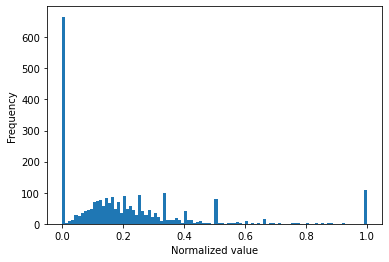

In [90]:
import matplotlib.pyplot as plt

plt.hist(normalized.values(), bins=100)
plt.xlabel('Normalized value')
plt.ylabel('Frequency')


We see gaussian bell distribution between values 0 < X < 0.4  
$$
X = \frac{suceeded}{total}
$$
We can also see the mean and std are around 0.2 from describe function below:


In [127]:
norm_ser = pd.DataFrame(normalized.values(), index=normalized.keys(), columns = ['Normalized'])
norm_ser.describe()



,Normalized
count,2643.000000
mean,0.203412
std,0.224730
min,0.000000
25%,0.000000
50%,0.156250
75%,0.272727
max,1.000000


We see that values 1 and 0 are artifacts, they dont belong in the Gaussian bell,  
We will remove them manualy to avoid biased mean and std values for a better z_score outlier detection

normalized: 2643
new_normalized: 1869
        Normalized
count  1869.000000
mean      0.229865
std       0.138889
min       0.017241
25%       0.129630
50%       0.200000
75%       0.297297
max       0.928571


Text(0, 0.5, 'Frequency')

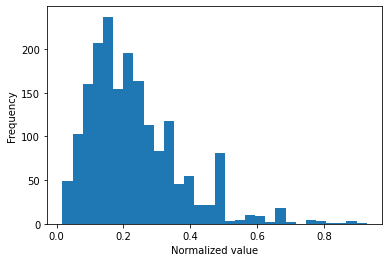

In [130]:
new_normalized = {}
for col, val in normalized.items():
    if val != 0 and val != 1 :
        new_normalized[col] = val
print(f'normalized: {len(normalized)}')
print(f'new_normalized: {len(new_normalized)}')

new_norm_ser = pd.DataFrame(new_normalized.values(), index=new_normalized.keys(), columns = ['Normalized'])
print(new_norm_ser.describe())


plt.hist(new_normalized.values(), bins=30)
plt.xlabel('Normalized value')
plt.ylabel('Frequency')
        

It means we can consider all other values as outliers

In [131]:
new_norm_ser

,Normalized
sector_AgriFood-tech & Water,0.101695
sector_AgriFood-tech & Water_Alternative Food Sources,0.211009
sector_AgriFood-tech & Water_Food Processing,0.055556
sector_AgriFood-tech & Water_Yield Optimization & Harvest,0.102804
sector_Aerospace & Aviation,0.201550
...,...
tag_pharmacology,0.500000
tag_wheel,0.333333
tag_micro-mobility,0.250000
tag_micromobility,0.166667


In [133]:
def outlier_detection_zscore_dist(df_orig):
    
    df = df_orig.copy()
    z_score = (df['Normalized']-df['Normalized'].mean()) / df['Normalized'].std()
    outliers = abs(z_score) > 3
    df['outliers'] = outliers

    return df

d = outlier_detection_zscore_dist(new_norm_ser)

new_new_norm_ser = new_norm_ser.copy()

for row in d.iterrows():
    if row[1]['outliers'] == True:
        new_new_norm_ser.drop(row[0], axis=0, inplace=True)

new_new_norm_ser






,Normalized
sector_AgriFood-tech & Water,0.101695
sector_AgriFood-tech & Water_Alternative Food Sources,0.211009
sector_AgriFood-tech & Water_Food Processing,0.055556
sector_AgriFood-tech & Water_Yield Optimization & Harvest,0.102804
sector_Aerospace & Aviation,0.201550
...,...
tag_pharmacology,0.500000
tag_wheel,0.333333
tag_micro-mobility,0.250000
tag_micromobility,0.166667


Text(0, 0.5, 'Frequency')

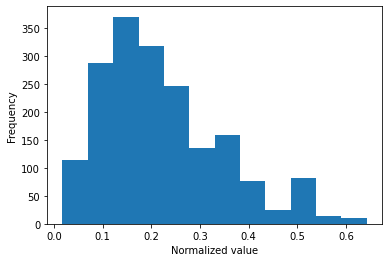

In [138]:
plt.hist(new_new_norm_ser['Normalized'], bins=12)
plt.xlabel('Normalized value')
plt.ylabel('Frequency')

In [141]:
df_after_cols_reduction = reduced_cols_df.copy()
print(f'Before: {df_after_cols_reduction.shape}')
not_outliers_bin_cols = list(new_new_norm_ser.index)
df_after_cols_reduction = df_after_cols_reduction[cat_cols + num_cols + not_outliers_bin_cols]
print(f'After: {df_after_cols_reduction.shape}')

Before: (10070, 2657)
After: (10070, 1850)


In [147]:
iqr_norm = new_norm_ser.copy()
    
Q1 = np.percentile(iqr_norm['Normalized'], 25)
Q3 = np.percentile(iqr_norm['Normalized'], 75)
IQR = 1.5*(Q3 - Q1)

lower_bound = Q1 - IQR
upper_bound = Q3 + IQR

iqr_norm.loc[(iqr_norm["Normalized"]> upper_bound) | (iqr_norm["Normalized"]<lower_bound), 'iqr_outliers'] = True
iqr_norm.loc[(iqr_norm["Normalized"]< upper_bound) & (iqr_norm["Normalized"]>lower_bound), 'iqr_outliers'] = False

iqr_norm['iqr_outliers'].value_counts()

False    1812
True       57
Name: iqr_outliers, dtype: int64

Text(0, 0.5, 'Frequency')

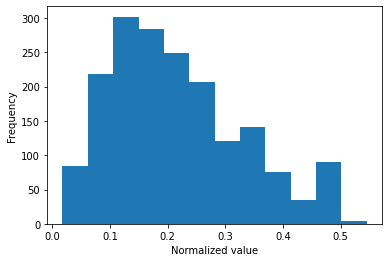

In [148]:
new_iqr_norm = iqr_norm.copy()
for row in new_iqr_norm.iterrows():
    if row[1]['iqr_outliers'] == True:
        new_iqr_norm.drop(row[0], axis=0, inplace=True)

plt.hist(new_iqr_norm['Normalized'], bins=12)
plt.xlabel('Normalized value')
plt.ylabel('Frequency')

In [149]:
df_after_cols_reduction = reduced_cols_df.copy()
print(f'Before: {df_after_cols_reduction.shape}')
not_outliers_bin_cols = list(new_iqr_norm.index)
df_after_cols_reduction = df_after_cols_reduction[cat_cols + num_cols + not_outliers_bin_cols]
print(f'After: {df_after_cols_reduction.shape}')

Before: (10070, 2657)
After: (10070, 1826)


# Summary:
After checking both methods for detecting outliers - Z score and IQR, 
We observed that Z score results were inferior to IQR results.  
Therefore, we chose to use IQR detection method to remove outliers.

In [151]:
df_after_cols_reduction.to_csv('df_after_cols_reduction.csv')